<a href="https://colab.research.google.com/github/hasanmdmahmudul/C-Programming/blob/main/Copy_of_PLOS_ONE_Alternative_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [ ]:
np.random.seed(7)

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
data= files.upload()

Saving VRU 5 Refined.xlsx to VRU 5 Refined.xlsx


In [ ]:
df=pd.read_excel('VRU 5 Refined.xlsx')

In [ ]:
df.shape

(13041, 22)

In [ ]:
df=df.drop(['VRU','Count_Casualty_Total'],axis='columns')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
dfle = df
dfle.Crash_Severity = le.fit_transform(dfle.Crash_Severity)
dfle.Crash_Year = le.fit_transform(dfle.Crash_Year)
dfle.Crash_Nature = le.fit_transform(dfle.Crash_Nature)
dfle.Crash_Type = le.fit_transform(dfle.Crash_Type)
dfle.Loc_ABS_Remoteness = le.fit_transform(dfle.Loc_ABS_Remoteness)
dfle.Crash_Roadway_Feature = le.fit_transform(dfle.Crash_Roadway_Feature)
dfle.Crash_Traffic_Control = le.fit_transform(dfle.Crash_Traffic_Control)

dfle.Crash_Road_Surface_Condition = le.fit_transform(dfle.Crash_Road_Surface_Condition)
dfle.Crash_Atmospheric_Condition = le.fit_transform(dfle.Crash_Atmospheric_Condition)
dfle.Crash_Lighting_Condition = le.fit_transform(dfle.Crash_Lighting_Condition)
dfle.Crash_Road_Horiz_Align = le.fit_transform(dfle.Crash_Road_Horiz_Align)
dfle.Crash_Road_Vert_Align = le.fit_transform(dfle.Crash_Road_Vert_Align)
dfle

,Crash_Severity,Crash_Year,Crash_Nature,Crash_Type,Loc_ABS_Remoteness,Crash_Roadway_Feature,Crash_Traffic_Control,Crash_Speed_Limit,Crash_Road_Surface_Condition,Crash_Atmospheric_Condition,Crash_Lighting_Condition,Crash_Road_Horiz_Align,Crash_Road_Vert_Align,Count_Casualty_Fatality,Count_Casualty_Hospitalised,Count_Casualty_MedicallyTreated,Count_Casualty_MinorInjury,Count_Unit_Motorcycle_Moped,Count_Unit_Bicycle,Count_Unit_Pedestrian
0,1,0,7,0,1,4,3,80 - 90 km/h,0,0,0,2,3,0,1,0,0,0,0,1
1,1,0,0,1,1,7,2,70 km/h,0,0,3,2,3,0,1,0,0,0,1,0
2,1,0,5,3,1,11,2,0 - 50 km/h,0,0,3,1,3,0,1,1,0,0,0,2
3,2,0,7,0,1,11,2,0 - 50 km/h,0,0,2,2,3,0,0,1,0,0,0,1
4,2,0,10,1,1,11,2,60 km/h,0,0,3,2,3,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13036,1,4,10,1,1,11,2,60 km/h,0,0,3,2,3,0,1,0,0,1,0,0
13037,2,4,7,0,1,11,2,0 - 50 km/h,0,0,0,2,3,0,0,1,0,0,0,1
13038,1,4,0,1,1,11,2,60 km/h,0,0,3,2,3,0,1,0,0,1,0,0
13039,1,4,7,0,1,11,2,0 - 50 km/h,0,0,0,2,3,0,1,0,0,0,1,0


In [ ]:
dfle= dfle.drop(['Crash_Year','Count_Casualty_Fatality',	'Count_Casualty_Hospitalised',	'Count_Casualty_MedicallyTreated',	'Count_Casualty_MinorInjury'],axis='columns')

In [ ]:
dfle.columns

Index(['Crash_Severity', 'Crash_Nature', 'Crash_Type', 'Loc_ABS_Remoteness',
       'Crash_Roadway_Feature', 'Crash_Traffic_Control', 'Crash_Speed_Limit',
       'Crash_Road_Surface_Condition', 'Crash_Atmospheric_Condition',
       'Crash_Lighting_Condition', 'Crash_Road_Horiz_Align',
       'Crash_Road_Vert_Align', 'Count_Unit_Motorcycle_Moped',
       'Count_Unit_Bicycle', 'Count_Unit_Pedestrian'],
      dtype='object')

In [ ]:
dfle= dfle.drop(['Crash_Speed_Limit'],axis='columns')

In [ ]:

from google.colab import files
dfle.to_excel('dfle.xlsx') 
files.download('dfle.xlsx')


NameError: ignored

In [ ]:
x = dfle.drop(['Crash_Severity'],axis='columns')
y2=dfle.Crash_Severity

In [ ]:
x

,Crash_Nature,Crash_Type,Loc_ABS_Remoteness,Crash_Roadway_Feature,Crash_Traffic_Control,Crash_Road_Surface_Condition,Crash_Atmospheric_Condition,Crash_Lighting_Condition,Crash_Road_Horiz_Align,Crash_Road_Vert_Align,Count_Unit_Motorcycle_Moped,Count_Unit_Bicycle,Count_Unit_Pedestrian
0,7,0,1,4,3,0,0,0,2,3,0,0,1
1,0,1,1,7,2,0,0,3,2,3,0,1,0
2,5,3,1,11,2,0,0,3,1,3,0,0,2
3,7,0,1,11,2,0,0,2,2,3,0,0,1
4,10,1,1,11,2,0,0,3,2,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13036,10,1,1,11,2,0,0,3,2,3,1,0,0
13037,7,0,1,11,2,0,0,0,2,3,0,0,1
13038,0,1,1,11,2,0,0,3,2,3,1,0,0
13039,7,0,1,11,2,0,0,0,2,3,0,1,0


In [ ]:
y2=dfle.Crash_Severity

In [ ]:
model.score(X_test, y_test)

NameError: ignored

In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predicted)

NameError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(model, m, n, cv=10)

In [ ]:
scores

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
x.shape, y2.shape

((13041, 13), (13041,))

In [ ]:

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import chi2
#data = pd.read_csv("D://Blogs//train.csv")
#X = data.iloc[:,0:20]  #independent columns
#y = data.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
#y=data['Target_values2']
#x=data.drop(["Target_values", "Target_values3","Target_values2"], axis=1) #https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
bestfeatures = SelectKBest(score_func=f_classif, k=10)  ##apply SelectKBest class to extract top 12 best features
fit = bestfeatures.fit(x,y2)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(13,'Score'))  #print 12 best features


                           Specs       Score
11            Count_Unit_Bicycle  104.358165
10   Count_Unit_Motorcycle_Moped   73.423855
8         Crash_Road_Horiz_Align   53.465824
1                     Crash_Type   36.786989
7       Crash_Lighting_Condition   31.549526
9          Crash_Road_Vert_Align   24.504260
3          Crash_Roadway_Feature   21.039552
12         Count_Unit_Pedestrian   18.021126
0                   Crash_Nature    8.608035
5   Crash_Road_Surface_Condition    7.552392
4          Crash_Traffic_Control    6.926219
2             Loc_ABS_Remoteness    2.649846
6    Crash_Atmospheric_Condition    0.486401


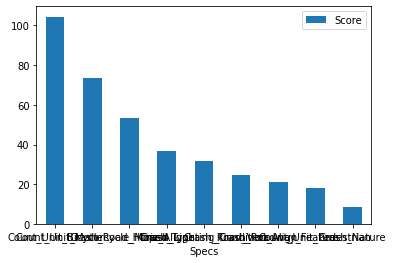

In [ ]:
df2=featureScores.nlargest(9,'Score')
df2.columns
ax = df2.plot.bar(x='Specs', y='Score', rot=0)


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#data = pd.read_csv("D://Blogs//train.csv")
#X = data.iloc[:,0:20]  #independent columns
#y = data.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
#y=data['Target_values2']
#x=data.drop(["Target_values", "Target_values3","Target_values2"], axis=1) #https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
bestfeatures = SelectKBest(score_func=chi2, k=10)  ##apply SelectKBest class to extract top 12 best features
fit = bestfeatures.fit(x,y2)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(13,'Score'))  #print 12 best features


                           Specs       Score
11            Count_Unit_Bicycle  250.934161
10   Count_Unit_Motorcycle_Moped  111.213439
1                     Crash_Type   96.015642
0                   Crash_Nature   81.911497
3          Crash_Roadway_Feature   57.897475
12         Count_Unit_Pedestrian   52.608495
7       Crash_Lighting_Condition   47.157503
8         Crash_Road_Horiz_Align   31.436926
4          Crash_Traffic_Control   30.107715
5   Crash_Road_Surface_Condition   28.540046
9          Crash_Road_Vert_Align   19.287500
2             Loc_ABS_Remoteness    3.518243
6    Crash_Atmospheric_Condition    2.786720


<Figure size 2000x2000 with 0 Axes>

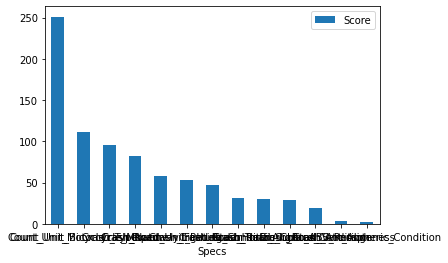

In [ ]:
df2=featureScores.nlargest(13,'Score')
df2.columns
#plt.figure(figsize=(30,30)) 
plt.figure(figsize=(20, 20), dpi=100)

ax = df2.plot.bar(x='Specs', y='Score', rot=0)

[0.09416092 0.03375306 0.11904292 0.17609887 0.13593046 0.05114256
 0.03642269 0.08022129 0.06246191 0.11085754 0.04380867 0.03506392
 0.02103521]


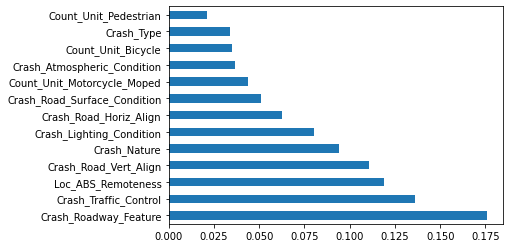

In [ ]:
## TRee based
import pandas as pd
import numpy as np
#data = pd.read_csv("D://Blogs//train.csv")
#X = data.iloc[:,0:20]  #independent columns
#y = data.iloc[:,-1]    #target column i.e price range
#y=data['Target_values2']
#x=data.drop(["Target_values", "Target_values3","Target_values2"], axis=1) #https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y2)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()



In [ ]:
x.columns

Index(['Crash_Nature', 'Crash_Type', 'Loc_ABS_Remoteness',
       'Crash_Roadway_Feature', 'Crash_Traffic_Control',
       'Crash_Road_Surface_Condition', 'Crash_Atmospheric_Condition',
       'Crash_Lighting_Condition', 'Crash_Road_Horiz_Align',
       'Crash_Road_Vert_Align', 'Count_Unit_Motorcycle_Moped',
       'Count_Unit_Bicycle', 'Count_Unit_Pedestrian'],
      dtype='object')

In [ ]:
dfle.columns

Index(['Crash_Severity', 'Crash_Nature', 'Crash_Type', 'Loc_ABS_Remoteness',
       'Crash_Roadway_Feature', 'Crash_Traffic_Control',
       'Crash_Road_Surface_Condition', 'Crash_Atmospheric_Condition',
       'Crash_Lighting_Condition', 'Crash_Road_Horiz_Align',
       'Crash_Road_Vert_Align', 'Count_Unit_Motorcycle_Moped',
       'Count_Unit_Bicycle', 'Count_Unit_Pedestrian'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Crash_Severity,Crash_Nature,Crash_Type,Loc_ABS_Remoteness,Crash_Roadway_Feature,Crash_Traffic_Control,Crash_Road_Surface_Condition,Crash_Atmospheric_Condition,Crash_Lighting_Condition,Crash_Road_Horiz_Align,Crash_Road_Vert_Align,Count_Unit_Motorcycle_Moped,Count_Unit_Bicycle,Count_Unit_Pedestrian
Crash_Severity,1.000000,0.008531,-0.086151,-0.016877,-0.049436,0.026343,-0.039336,-0.003207,0.075666,0.106873,0.074408,-0.122517,0.149486,-0.033022
Crash_Nature,0.008531,1.000000,-0.240305,0.004134,0.188160,-0.023368,-0.027655,-0.020935,-0.050835,0.037472,0.026991,-0.081832,-0.253589,0.380272
Crash_Type,-0.086151,-0.240305,1.000000,-0.016881,0.115888,-0.089470,0.129677,0.046694,0.050018,-0.298570,-0.111130,0.486783,-0.052561,-0.515993
Loc_ABS_Remoteness,-0.016877,0.004134,-0.016881,1.000000,-0.019416,-0.016571,0.083498,0.008588,-0.026719,0.062829,0.080584,-0.042494,0.028709,0.013465
Crash_Roadway_Feature,-0.049436,0.188160,0.115888,-0.019416,1.000000,-0.140368,0.017526,-0.009018,0.030688,-0.129989,-0.030886,0.035568,-0.113933,0.076971
Crash_Traffic_Control,0.026343,-0.023368,-0.089470,-0.016571,-0.140368,1.000000,-0.012647,0.000142,-0.000181,0.057794,-0.012755,-0.031108,-0.018898,0.050868
Crash_Road_Surface_Condition,-0.039336,-0.027655,0.129677,0.083498,0.017526,-0.012647,1.000000,0.531492,-0.035631,-0.068115,-0.046253,0.081328,-0.067606,-0.012417
Crash_Atmospheric_Condition,-0.003207,-0.020935,0.046694,0.008588,-0.009018,0.000142,0.531492,1.000000,-0.084231,-0.008284,-0.005062,0.019654,-0.040756,0.030558
Crash_Lighting_Condition,0.075666,-0.050835,0.050018,-0.026719,0.030688,-0.000181,-0.035631,-0.084231,1.000000,-0.033143,-0.001515,0.028793,0.092238,-0.114202
Crash_Road_Horiz_Align,0.106873,0.037472,-0.298570,0.062829,-0.129989,0.057794,-0.068115,-0.008284,-0.033143,1.000000,0.234111,-0.223762,0.102175,0.138298


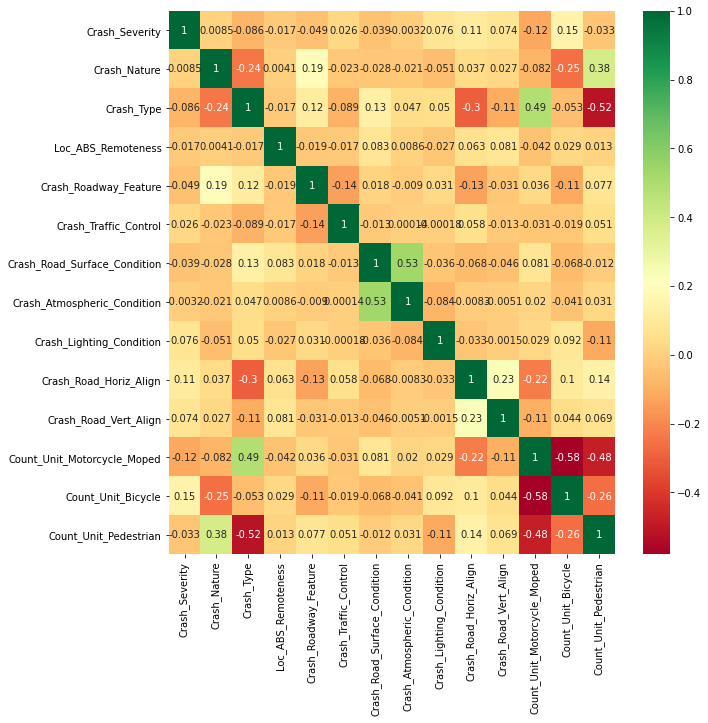

In [ ]:


#################################### Correlation matrix: 2 Class ##################################
"""
EEG 3.Correlation Matrix with Heatmap
Correlation states how the features are related to each other or the target variable.
Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)
Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.


"""
import pandas as pd
import numpy as np
import seaborn as sns
#data = pd.read_csv("D://Blogs//train.csv")
#X = data.iloc[:,0:20]  #independent columns
#y = data.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
data_EEG= dfle[['Crash_Severity', 'Crash_Nature', 'Crash_Type', 'Loc_ABS_Remoteness',
       'Crash_Roadway_Feature', 'Crash_Traffic_Control',
       'Crash_Road_Surface_Condition', 'Crash_Atmospheric_Condition',
       'Crash_Lighting_Condition', 'Crash_Road_Horiz_Align',
       'Crash_Road_Vert_Align', 'Count_Unit_Motorcycle_Moped',
       'Count_Unit_Bicycle', 'Count_Unit_Pedestrian']]
#data00=data.drop(["Target_values", "Target_values3"], axis=1)
#y=data['Target_values2']
#x=data.drop(["Target_values", "Target_values3","Target_values2"], axis=1)
corrmat = data_EEG.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(data_EEG[top_corr_features].corr(),annot=True,cmap="RdYlGn")

data_EEG[top_corr_features].corr()


,Feature_Importance,Features
10,1.000000,Crash_Road_Vert_Align
9,0.234111,Crash_Road_Horiz_Align
3,0.080584,Loc_ABS_Remoteness
0,0.074408,Crash_Severity
13,0.069008,Count_Unit_Pedestrian
12,0.044158,Count_Unit_Bicycle
1,0.026991,Crash_Nature
8,-0.001515,Crash_Lighting_Condition
7,-0.005062,Crash_Atmospheric_Condition
5,-0.012755,Crash_Traffic_Control


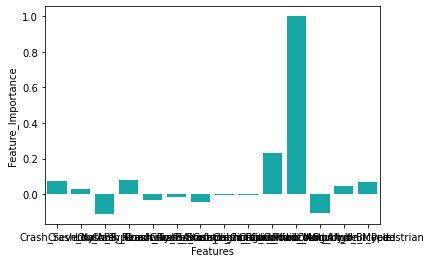

In [ ]:
df1 = pd.DataFrame({'Feature_Importance': dfle[top_corr_features].corr().values[10,:], 'Features':['Crash_Severity', 'Crash_Nature', 'Crash_Type', 'Loc_ABS_Remoteness',
       'Crash_Roadway_Feature', 'Crash_Traffic_Control',
       'Crash_Road_Surface_Condition', 'Crash_Atmospheric_Condition',
       'Crash_Lighting_Condition', 'Crash_Road_Horiz_Align',
       'Crash_Road_Vert_Align', 'Count_Unit_Motorcycle_Moped',
       'Count_Unit_Bicycle', 'Count_Unit_Pedestrian']})
sns.barplot(x='Features',y="Feature_Importance",  data=df1, color="c")

df1.sort_values(by='Feature_Importance', ascending=False)

,Feature_Importance,Features
10,1.000000,Crash_Road_Vert_Align
9,0.234111,Crash_Road_Horiz_Align
2,0.111130,Crash_Type
11,0.105033,Count_Unit_Motorcycle_Moped
3,0.080584,Loc_ABS_Remoteness
0,0.074408,Crash_Severity
13,0.069008,Count_Unit_Pedestrian
6,0.046253,Crash_Road_Surface_Condition
12,0.044158,Count_Unit_Bicycle
4,0.030886,Crash_Roadway_Feature


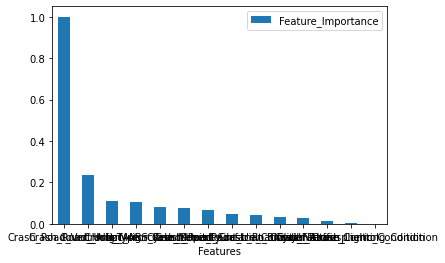

In [ ]:
#############Plot ###############
df2=df1.sort_values(by='Feature_Importance', ascending=False)
df2['Feature_Importance']=df2['Feature_Importance'].abs()
df3=df2.sort_values(by='Feature_Importance', ascending=False)
ax = df3.plot.bar(x='Features', y='Feature_Importance', rot=0)
df3


Feature ranking:
1. feature 3 (0.163882)
2. feature 9 (0.121014)
3. feature 2 (0.119407)
4. feature 4 (0.113882)
5. feature 7 (0.101421)
6. feature 0 (0.099688)
7. feature 8 (0.080785)
8. feature 5 (0.052094)
9. feature 6 (0.036237)
10. feature 11 (0.032248)
11. feature 10 (0.030996)
12. feature 1 (0.029682)
13. feature 12 (0.018665)


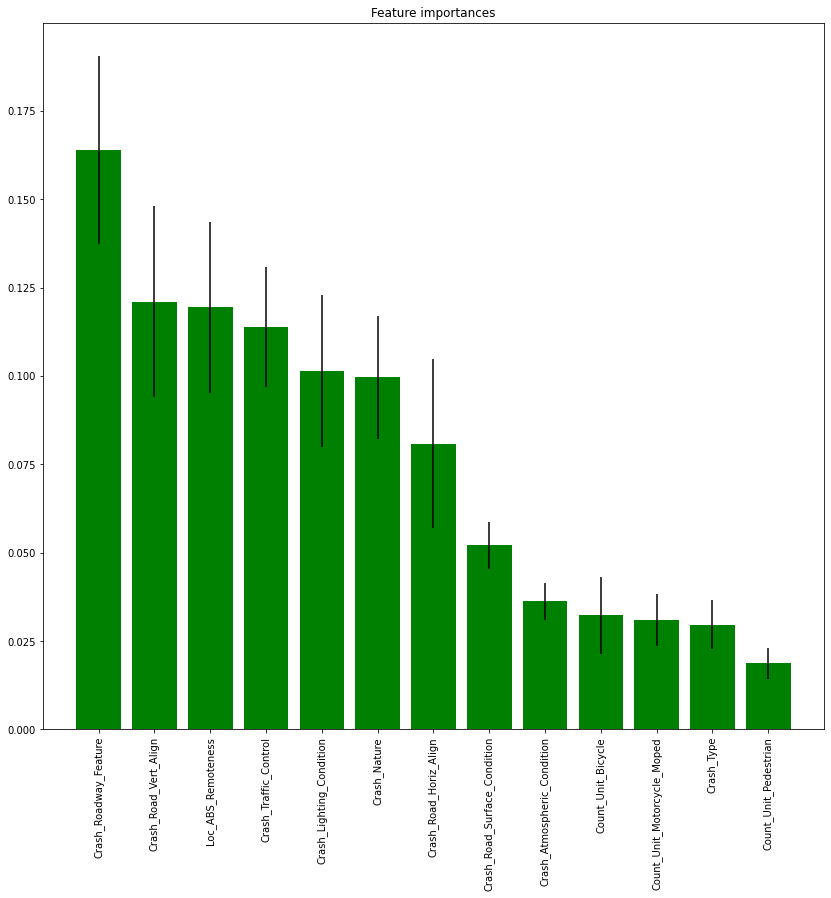

In [ ]:

###################### Random Forest Tree based Feature Selecttion: 2 class ######
#https://www.kaggle.com/kanncaa1/feature-selection-and-data-visualization
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
## Tree based feature selection and random forest classification

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier()      
clf_fit = clf.fit(x,y2)
importances = clf_fit.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_fit.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x.shape[1]), x.columns[indices],rotation=90)
plt.xlim([-1, x.shape[1]])
plt.show()



In [ ]:

######################## Recursive feature elimination (RFE) with random forest############
"""
http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html Basically, it uses one of the classification methods (random forest in our example), assign weights to each of features. Whose absolute weights are the smallest are pruned from the current set features. That procedure is recursively repeated on the pruned set until the desired number of features

Like previous method, we will use 5 features. However, which 5 features will we use ? We will choose them with RFE method.
"""

from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf = RandomForestClassifier()      
rfe = RFE(estimator=clf, n_features_to_select=13, step=1)
rfe = rfe.fit(x, y2)
print('Chosen best 10 feature by rfe:',x.columns[rfe.support_])


#######################PCA#########################



Chosen best 10 feature by rfe: Index(['Crash_Nature', 'Crash_Type', 'Loc_ABS_Remoteness',
       'Crash_Roadway_Feature', 'Crash_Traffic_Control',
       'Crash_Road_Surface_Condition', 'Crash_Atmospheric_Condition',
       'Crash_Lighting_Condition', 'Crash_Road_Horiz_Align',
       'Crash_Road_Vert_Align', 'Count_Unit_Motorcycle_Moped',
       'Count_Unit_Bicycle', 'Count_Unit_Pedestrian'],
      dtype='object')


Text(0, 0.5, 'explained_variance_ratio_')

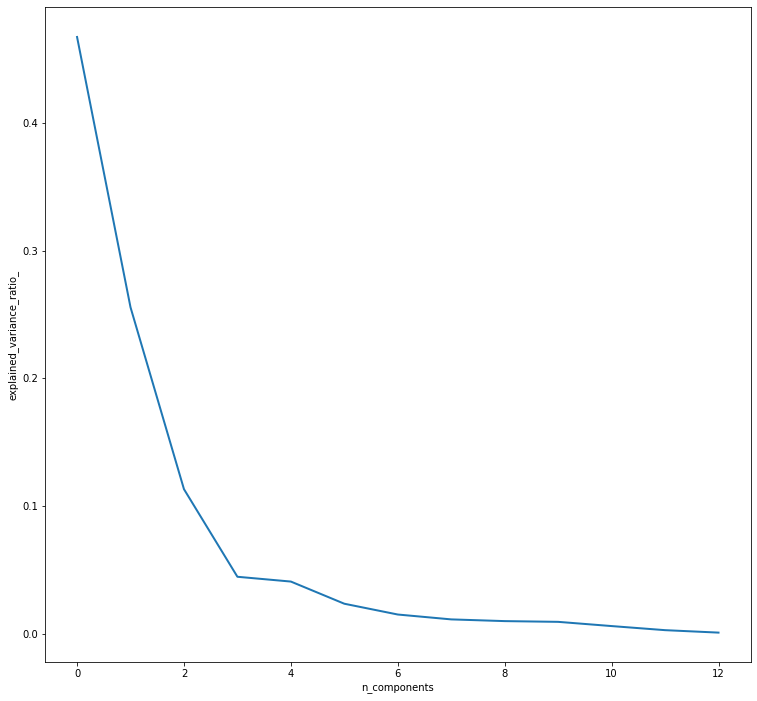

In [ ]:
############################ pca####################
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x)

plt.figure(1, figsize=(14, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')



In [ ]:
dfle.columns

Index(['Crash_Severity', 'Crash_Nature', 'Crash_Type', 'Loc_ABS_Remoteness',
       'Crash_Roadway_Feature', 'Crash_Traffic_Control',
       'Crash_Road_Surface_Condition', 'Crash_Atmospheric_Condition',
       'Crash_Lighting_Condition', 'Crash_Road_Horiz_Align',
       'Crash_Road_Vert_Align', 'Count_Unit_Motorcycle_Moped',
       'Count_Unit_Bicycle', 'Count_Unit_Pedestrian'],
      dtype='object')

In [ ]:
x1

,Crash_Severity,Crash_Nature,Crash_Type,Loc_ABS_Remoteness,Crash_Roadway_Feature,Crash_Traffic_Control,Crash_Road_Surface_Condition,Crash_Lighting_Condition,Crash_Road_Horiz_Align,Crash_Road_Vert_Align,Count_Unit_Motorcycle_Moped,Count_Unit_Bicycle,Count_Unit_Pedestrian
0,1,7,0,1,4,3,0,0,2,3,0,0,1
1,1,0,1,1,7,2,0,3,2,3,0,1,0
2,1,5,3,1,11,2,0,3,1,3,0,0,2
3,2,7,0,1,11,2,0,2,2,3,0,0,1
4,2,10,1,1,11,2,0,3,2,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13036,1,10,1,1,11,2,0,3,2,3,1,0,0
13037,2,7,0,1,11,2,0,0,2,3,0,0,1
13038,1,0,1,1,11,2,0,3,2,3,1,0,0
13039,1,7,0,1,11,2,0,0,2,3,0,1,0


In [ ]:
x1 = dfle.drop(['Crash_Severity'],axis='columns')
y2=dfle.Crash_Severity

In [ ]:
x1.shape

(13041, 13)

In [ ]:
x1

,Crash_Nature,Crash_Type,Loc_ABS_Remoteness,Crash_Roadway_Feature,Crash_Traffic_Control,Crash_Road_Surface_Condition,Crash_Atmospheric_Condition,Crash_Lighting_Condition,Crash_Road_Horiz_Align,Crash_Road_Vert_Align,Count_Unit_Motorcycle_Moped,Count_Unit_Bicycle,Count_Unit_Pedestrian
0,7,0,1,4,3,0,0,0,2,3,0,0,1
1,0,1,1,7,2,0,0,3,2,3,0,1,0
2,5,3,1,11,2,0,0,3,1,3,0,0,2
3,7,0,1,11,2,0,0,2,2,3,0,0,1
4,10,1,1,11,2,0,0,3,2,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13036,10,1,1,11,2,0,0,3,2,3,1,0,0
13037,7,0,1,11,2,0,0,0,2,3,0,0,1
13038,0,1,1,11,2,0,0,3,2,3,1,0,0
13039,7,0,1,11,2,0,0,0,2,3,0,1,0


In [ ]:
##  Class 0  Vs (class 1 & 2 & 3) ###############
#y=y3[y3!=2]
#x1=x[y3!=2]

#x1, y = x[y3 != 2], y3[y3 != 2]
#putting x as X, putting only y=1, converting y=0 as 0, y=2 as 0


x1=x1;
ya=np.where(y2==0, 10, y2) 
yb=np.where(ya==1, 20, ya) 
yc=np.where(yb==2, 30, yb) 
yd=np.where(yc==3, 40, yb) 

yd=np.where(yc==10, 1, yc) 
ye=np.where(yd==20, 0, yd) 
yf=np.where(ye==30, 0, ye) 
y=np.where(yf==40, 0, ye) 


In [ ]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:


#DEcomposition
#https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py

from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(x1)


In [ ]:


#####
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
from sklearn.model_selection import GridSearchCV
#from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestClassifier
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [2, 3, 4],
    #'max_features': [1, 2],
    #'min_samples_leaf': [4, 5,6],
    #'min_samples_split': [2,3,4],
    'n_estimators': [100, 200, 300]
}
# Create a based model
#RandomForestClassifier
#rf = RandomForestRegressor()
rfc = RandomForestClassifier(random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)



# Fit the grid search to the data
grid_search.fit(X, y.ravel())
grid_search.best_params_

####

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   43.0s finished


{'bootstrap': True, 'max_depth': 2, 'n_estimators': 100}

In [ ]:






#https://stackoverflow.com/questions/50394644/how-to-calculate-sensitvity-and-specificity-in-cross-validation
#https://stackoverflow.com/questions/50394644/how-to-calculate-sensitvity-and-specificity-in-cross-validation
#Recall/ Precision

# "?? ????????? ??????" ????? ?? "?? ?????" ???? ??????????
#knn = KNeighborsClassifier(n_neighbors=26)

knn= RandomForestClassifier(max_depth=2,n_estimators= 100, random_state = 42)

from sklearn.model_selection import cross_val_score
#print(cross_val_score(knn, X, y.ravel(), cv=10, scoring='recall').mean())
#b_a= cross_val_score(knn, X ,y.ravel(),cv=10, scoring='balanced_accuracy') 
#sens=cross_val_score(knn, X, y.ravel(), cv=10, scoring='recall')
#print (((2*b_a)-sens).mean())
print(cross_val_score(knn, X, y2.ravel(), cv=10, scoring='accuracy').mean())
#print(cross_val_score(knn, X, y.ravel(), cv=10, scoring='roc_auc').mean())



0.5649106786075266


In [ ]:
X.shape

(13041, 13)

In [ ]:
##  Class 1  Vs (class 0 & 2 & 3) ###############
#y=y3[y3!=2]
#x1=x[y3!=2]

#x1, y = x[y3 != 2], y3[y3 != 2]
#putting x as X, putting only y=1, converting y=0 as 0, y=2 as 0


x1=x1;
ya=np.where(y2==0, 10, y2) 
yb=np.where(ya==1, 20, ya) 
yc=np.where(yb==2, 30, yb) 
yd=np.where(yc==3, 40, yb) 

yd=np.where(yc==10, 0, yc) 
ye=np.where(yd==20, 1, yd) 
yf=np.where(ye==30, 0, ye) 
y=np.where(yf==40, 0, ye) 


In [ ]:


#####
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
from sklearn.model_selection import GridSearchCV
#from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestClassifier
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [2, 3, 4],
    #'max_features': [1, 2],
    #'min_samples_leaf': [4, 5,6],
    #'min_samples_split': [2,3,4],
    'n_estimators': [100, 200, 300]
}
# Create a based model
#RandomForestClassifier
#rf = RandomForestRegressor()
rfc = RandomForestClassifier(random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)



# Fit the grid search to the data
grid_search.fit(X, y.ravel())
grid_search.best_params_

####

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   42.8s finished


{'bootstrap': True, 'max_depth': 2, 'n_estimators': 100}

In [ ]:






#https://stackoverflow.com/questions/50394644/how-to-calculate-sensitvity-and-specificity-in-cross-validation
#https://stackoverflow.com/questions/50394644/how-to-calculate-sensitvity-and-specificity-in-cross-validation
#Recall/ Precision

# "?? ????????? ??????" ????? ?? "?? ?????" ???? ??????????
#knn = KNeighborsClassifier(n_neighbors=26)

knn= RandomForestClassifier(max_depth=4,n_estimators= 100, random_state = 42)

from sklearn.model_selection import cross_val_score
#print(cross_val_score(knn, X, y.ravel(), cv=10, scoring='recall').mean())
#b_a= cross_val_score(knn, X ,y.ravel(),cv=10, scoring='balanced_accuracy') 
#sens=cross_val_score(knn, X, y.ravel(), cv=10, scoring='recall')
#print (((2*b_a)-sens).mean())
print(cross_val_score(knn, X, y.ravel(), cv=10, scoring='accuracy').mean())
#print(cross_val_score(knn, X, y.ravel(), cv=10, scoring='roc_auc').mean())



0.5637603718590602


In [ ]:
##  Class 1  Vs (class 0 & 2 & 3) ###############
#y=y3[y3!=2]
#x1=x[y3!=2]

#x1, y = x[y3 != 2], y3[y3 != 2]
#putting x as X, putting only y=1, converting y=0 as 0, y=2 as 0


x1=x1;
ya=np.where(y2==0, 10, y2) 
yb=np.where(ya==1, 20, ya) 
yc=np.where(yb==2, 30, yb) 
yd=np.where(yc==3, 40, yb) 

yd=np.where(yc==10, 0, yc) 
ye=np.where(yd==20, 0, yd) 
yf=np.where(ye==30, 1, ye) 
y=np.where(yf==40, 0, ye) 


In [ ]:


#####
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
from sklearn.model_selection import GridSearchCV
#from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestClassifier
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [2, 3, 4],
    #'max_features': [1, 2],
    #'min_samples_leaf': [4, 5,6],
    #'min_samples_split': [2,3,4],
    'n_estimators': [100, 200, 300]
}
# Create a based model
#RandomForestClassifier
#rf = RandomForestRegressor()
rfc = RandomForestClassifier(random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)



# Fit the grid search to the data
grid_search.fit(X, y.ravel())
grid_search.best_params_

####

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   41.0s finished


{'bootstrap': True, 'max_depth': 4, 'n_estimators': 100}

In [ ]:






#https://stackoverflow.com/questions/50394644/how-to-calculate-sensitvity-and-specificity-in-cross-validation
#https://stackoverflow.com/questions/50394644/how-to-calculate-sensitvity-and-specificity-in-cross-validation
#Recall/ Precision

# "?? ????????? ??????" ????? ?? "?? ?????" ???? ??????????
#knn = KNeighborsClassifier(n_neighbors=26)

knn= RandomForestClassifier(max_depth=4,n_estimators= 300, random_state = 42)

from sklearn.model_selection import cross_val_score
#print(cross_val_score(knn, X, y.ravel(), cv=10, scoring='recall').mean())
#b_a= cross_val_score(knn, X ,y.ravel(),cv=10, scoring='balanced_accuracy') 
#sens=cross_val_score(knn, X, y.ravel(), cv=10, scoring='recall')
#print (((2*b_a)-sens).mean())
print(cross_val_score(knn, X, y.ravel(), cv=10, scoring='accuracy').mean())
#print(cross_val_score(knn, X, y.ravel(), cv=10, scoring='roc_auc').mean())



0.9227055567308371


In [ ]:
##  Class 1  Vs (class 0 & 2 & 3) ###############
#y=y3[y3!=2]
#x1=x[y3!=2]

#x1, y = x[y3 != 2], y3[y3 != 2]
#putting x as X, putting only y=1, converting y=0 as 0, y=2 as 0


x1=x1;
ya=np.where(y2==0, 10, y2) 
yb=np.where(ya==1, 20, ya) 
yc=np.where(yb==2, 30, yb) 
yd=np.where(yc==3, 40, yb) 

yd=np.where(yc==10, 0, yc) 
ye=np.where(yd==20, 0, yd) 
yf=np.where(ye==30, 0, ye) 
y=np.where(yf==40, 1, ye) 


In [ ]:


#####
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
from sklearn.model_selection import GridSearchCV
#from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestClassifier
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [2, 3, 4],
    #'max_features': [1, 2],
    #'min_samples_leaf': [4, 5,6],
    #'min_samples_split': [2,3,4],
    'n_estimators': [100, 200, 300]
}
# Create a based model
#RandomForestClassifier
#rf = RandomForestRegressor()
rfc = RandomForestClassifier(random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)



# Fit the grid search to the data
grid_search.fit(X, y.ravel())
grid_search.best_params_

####

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   41.0s finished


{'bootstrap': True, 'max_depth': 4, 'n_estimators': 100}

In [ ]:






#https://stackoverflow.com/questions/50394644/how-to-calculate-sensitvity-and-specificity-in-cross-validation
#https://stackoverflow.com/questions/50394644/how-to-calculate-sensitvity-and-specificity-in-cross-validation
#Recall/ Precision

# "?? ????????? ??????" ????? ?? "?? ?????" ???? ??????????
#knn = KNeighborsClassifier(n_neighbors=26)

knn= RandomForestClassifier(max_depth=4,n_estimators= 100, random_state = 42)

from sklearn.model_selection import cross_val_score
#print(cross_val_score(knn, X, y.ravel(), cv=10, scoring='recall').mean())
#b_a= cross_val_score(knn, X ,y.ravel(),cv=10, scoring='balanced_accuracy') 
#sens=cross_val_score(knn, X, y.ravel(), cv=10, scoring='recall')
#print (((2*b_a)-sens).mean())
print(cross_val_score(knn, X, y.ravel(), cv=10, scoring='accuracy').mean())
#print(cross_val_score(knn, X, y.ravel(), cv=10, scoring='roc_auc').mean())



0.9281503420069107


In [ ]:


#####
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
from sklearn.model_selection import GridSearchCV
#from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestClassifier
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [2, 3, 4],
    #'max_features': [1, 2],
    #'min_samples_leaf': [4, 5,6],
    #'min_samples_split': [2,3,4],
    'n_estimators': [100, 200, 300]
}
# Create a based model
#RandomForestClassifier
#rf = RandomForestRegressor()
rfc = RandomForestClassifier(random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)



# Fit the grid search to the data
grid_search.fit(X, y2.ravel())
grid_search.best_params_

####

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   43.1s finished


{'bootstrap': True, 'max_depth': 4, 'n_estimators': 100}

In [ ]:






#https://stackoverflow.com/questions/50394644/how-to-calculate-sensitvity-and-specificity-in-cross-validation
#https://stackoverflow.com/questions/50394644/how-to-calculate-sensitvity-and-specificity-in-cross-validation
#Recall/ Precision

# "?? ????????? ??????" ????? ?? "?? ?????" ???? ??????????
#knn = KNeighborsClassifier(n_neighbors=26)

knn= RandomForestClassifier(max_depth=4,n_estimators= 100, random_state = 42)

from sklearn.model_selection import cross_val_score
#print(cross_val_score(knn, X, y.ravel(), cv=10, scoring='recall').mean())
#b_a= cross_val_score(knn, X ,y.ravel(),cv=10, scoring='balanced_accuracy') 
#sens=cross_val_score(knn, X, y.ravel(), cv=10, scoring='recall')
#print (((2*b_a)-sens).mean())
print(cross_val_score(knn, X, y2.ravel(), cv=10, scoring='accuracy').mean())
#print(cross_val_score(knn, X, y.ravel(), cv=10, scoring='roc_auc').mean())



0.8997014785041018


In [ ]:
y2

0        1
1        1
2        1
3        2
4        2
        ..
13036    1
13037    2
13038    1
13039    1
13040    1
Name: Crash_Severity, Length: 13041, dtype: int64

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from pydot import graph_from_dot_data
import pandas as pd
import numpy as np

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [ ]:

y2=dfle.Crash_Severity
X = x
x1=x
y = y2

In [ ]:
x1.columns

Index(['Crash_Year', 'Crash_Nature', 'Crash_Type', 'Loc_ABS_Remoteness',
       'Crash_Roadway_Feature', 'Crash_Traffic_Control',
       'Crash_Road_Surface_Condition', 'Crash_Lighting_Condition',
       'Crash_Road_Horiz_Align', 'Crash_Road_Vert_Align',
       'Count_Casualty_Fatality', 'Count_Casualty_Hospitalised',
       'Count_Casualty_MedicallyTreated', 'Count_Casualty_MinorInjury',
       'Count_Unit_Motorcycle_Moped', 'Count_Unit_Bicycle',
       'Count_Unit_Pedestrian'],
      dtype='object')

In [ ]:
dfle.drop(['Crash_Year','Count_Casualty_Fatality',	'Count_Casualty_Hospitalised',	'Count_Casualty_MedicallyTreated',	'Count_Casualty_MinorInjury',	'Count_Unit_Motorcycle_Moped',	'Count_Unit_Bicycle',	'Count_Unit_Pedestrian'],axis='columns')

In [ ]:
x1 = x1.drop(['Crash_Year', 'Crash_Nature', 'Crash_Type', 'Loc_ABS_Remoteness',
       'Crash_Roadway_Feature', 'Crash_Traffic_Control',
       'Crash_Road_Surface_Condition', 'Crash_Lighting_Condition',
       'Crash_Road_Horiz_Align', 'Crash_Road_Vert_Align',
       'Count_Casualty_Fatality', 'Count_Casualty_Hospitalised',
       'Count_Casualty_MedicallyTreated', 'Count_Casualty_MinorInjury',
       'Count_Unit_Motorcycle_Moped', 'Count_Unit_Bicycle',
       'Count_Unit_Pedestrian'],axis='columns')

In [ ]:
x1

,Crash_Nature,Crash_Type,Loc_ABS_Remoteness,Crash_Roadway_Feature,Crash_Traffic_Control,Crash_Road_Surface_Condition,Crash_Atmospheric_Condition,Crash_Lighting_Condition,Crash_Road_Horiz_Align,Crash_Road_Vert_Align
0,7,0,1,4,3,0,0,0,2,3
1,0,1,1,7,2,0,0,3,2,3
2,5,3,1,11,2,0,0,3,1,3
3,7,0,1,11,2,0,0,2,2,3
4,10,1,1,11,2,0,0,3,2,3
...,...,...,...,...,...,...,...,...,...,...
13036,10,1,1,11,2,0,0,3,2,3
13037,7,0,1,11,2,0,0,0,2,3
13038,0,1,1,11,2,0,0,3,2,3
13039,7,0,1,11,2,0,0,0,2,3


In [ ]:
#Decision_Tree
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from pydot import graph_from_dot_data
import pandas as pd
import numpy as np

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y2, random_state=1)

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=dfle.columns)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

AttributeError: ignored

In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
species = np.array(y_test).argmax(axis=1)
predictions = np.array(y_pred).argmax(axis=1)
confusion_matrix(species, predictions)

AxisError: ignored

In [ ]:
tree.plot_tree(dt) 

NameError: ignored

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

[Text(197.83636363636364, 190.26, 'X[12] <= 0.5\ngini = 0.567\nsamples = 13041\nvalue = [380, 7367, 4248, 1046]'),
 Text(121.74545454545455, 135.9, 'X[13] <= 0.5\ngini = 0.392\nsamples = 5628\nvalue = [334, 0, 4248, 1046]'),
 Text(60.872727272727275, 81.53999999999999, 'X[11] <= 0.5\ngini = 0.355\nsamples = 1360\nvalue = [314, 0, 0, 1046]'),
 Text(30.436363636363637, 27.180000000000007, 'gini = 0.0\nsamples = 1046\nvalue = [0, 0, 0, 1046]'),
 Text(91.30909090909091, 27.180000000000007, 'gini = 0.0\nsamples = 314\nvalue = [314, 0, 0, 0]'),
 Text(182.61818181818182, 81.53999999999999, 'X[0] <= 1.0\ngini = 0.009\nsamples = 4268\nvalue = [20, 0, 4248, 0]'),
 Text(152.1818181818182, 27.180000000000007, 'gini = 0.0\nsamples = 20\nvalue = [20, 0, 0, 0]'),
 Text(213.05454545454546, 27.180000000000007, 'gini = 0.0\nsamples = 4248\nvalue = [0, 0, 4248, 0]'),
 Text(273.92727272727274, 135.9, 'X[11] <= 0.5\ngini = 0.012\nsamples = 7413\nvalue = [46, 7367, 0, 0]'),
 Text(243.4909090909091, 81.53999

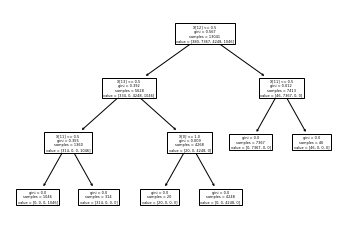

In [ ]:
tree.plot_tree(clf) 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y2, random_state=1)

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics

y_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))


1.0


In [ ]:
#from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [ ]:
clf = DecisionTreeClassifier(max_depth=20)
knn=clf
print(cross_val_score(knn, x1, y2, cv=10, scoring='accuracy').mean())
print(cross_val_score(knn, x1, y2, cv=10, scoring='accuracy').max())
print(cross_val_score(knn, x1, y2, cv=10, scoring='accuracy').min())

1.0
1.0
1.0


In [ ]:


#Tuning

import pandas as pd 
import numpy as np 
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.datasets import load_breast_cancer 
from sklearn import svm
from sklearn.svm import SVC 
  

from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 


# fitting the model for grid search 
grid.fit(X, y.ravel()) 

#########################





Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.695, total=   9.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.8s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.705, total=   9.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   19.4s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.705, total=   9.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.621, total=   9.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.615, total=   9.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.965, total=   3.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.974, total=   3.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.974, total=   3.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.971, total=   3.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  8.0min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
#########################







# print best parameter after tuning 
print(grid.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 


###########################

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [ ]:
# train the model on train set 
from sklearn import svm
from sklearn.model_selection import cross_val_score


#https://stackoverflow.com/questions/50394644/how-to-calculate-sensitvity-and-specificity-in-cross-validation
#Recall/ Precision
############################################# Change Hyperparameters here    ##############################
clf = svm.SVC(kernel='rbf', probability=True,C=10.0, gamma=0.001, random_state=None,).fit(X,y.ravel())
#print(cross_val_score(clf, X, y.ravel(), cv=10, scoring='recall').mean())
#b_a= cross_val_score(clf, X ,y.ravel(),cv=10, scoring='balanced_accuracy') 
#sens=cross_val_score(clf, X, y.ravel(), cv=10, scoring='recall')
#print (((2*b_a)-sens).mean())
print(cross_val_score(clf, X, y.ravel(), cv=10, scoring='accuracy').mean())
#print(cross_val_score(clf, X, y.ravel(), cv=10, scoring='roc_auc').mean())


1.0


In [ ]:
x1

,Crash_Severity,Crash_Year,Crash_Nature,Crash_Type,Loc_ABS_Remoteness,Crash_Roadway_Feature,Crash_Traffic_Control,Crash_Road_Surface_Condition,Crash_Lighting_Condition,Crash_Road_Horiz_Align,Crash_Road_Vert_Align,Count_Casualty_Fatality,Count_Casualty_Hospitalised,Count_Casualty_MedicallyTreated,Count_Casualty_MinorInjury,Count_Unit_Motorcycle_Moped,Count_Unit_Bicycle,Count_Unit_Pedestrian
0,1,0,7,0,1,4,3,0,0,2,3,0,1,0,0,0,0,1
1,1,0,0,1,1,7,2,0,3,2,3,0,1,0,0,0,1,0
2,1,0,5,3,1,11,2,0,3,1,3,0,1,1,0,0,0,2
3,2,0,7,0,1,11,2,0,2,2,3,0,0,1,0,0,0,1
4,2,0,10,1,1,11,2,0,3,2,3,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13036,1,4,10,1,1,11,2,0,3,2,3,0,1,0,0,1,0,0
13037,2,4,7,0,1,11,2,0,0,2,3,0,0,1,0,0,0,1
13038,1,4,0,1,1,11,2,0,3,2,3,0,1,0,0,1,0,0
13039,1,4,7,0,1,11,2,0,0,2,3,0,1,0,0,0,1,0


In [ ]:
#One Vs ALl
##  Class 0  Vs (class 1 & 2 & 3) ###############
#y=y3[y3!=2]
#x1=x[y3!=2]

#x1, y = x[y3 != 2], y3[y3 != 2]
#putting x as X, putting only y=1, converting y=0 as 0, y=2 as 0


x1=x1;
ya=np.where(y2==0, 10, y2) 
yb=np.where(ya==1, 20, ya) 
yc=np.where(yb==2, 30, yb) 
yd=np.where(yc==3, 40, yb) 

yd=np.where(yc==10, 1, yc) 
ye=np.where(yd==20, 0, yd) 
yf=np.where(ye==30, 0, ye) 
y=np.where(yf==40, 0, ye) 


In [ ]:
x1.shape, y.shape

((13041, 13), (13041,))

In [ ]:
x1

,Crash_Severity,Crash_Nature,Crash_Type,Loc_ABS_Remoteness,Crash_Roadway_Feature,Crash_Traffic_Control,Crash_Road_Surface_Condition,Crash_Lighting_Condition,Crash_Road_Horiz_Align,Crash_Road_Vert_Align,Count_Unit_Motorcycle_Moped,Count_Unit_Bicycle,Count_Unit_Pedestrian
0,1,7,0,1,4,3,0,0,2,3,0,0,1
1,1,0,1,1,7,2,0,3,2,3,0,1,0
2,1,5,3,1,11,2,0,3,1,3,0,0,2
3,2,7,0,1,11,2,0,2,2,3,0,0,1
4,2,10,1,1,11,2,0,3,2,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13036,1,10,1,1,11,2,0,3,2,3,1,0,0
13037,2,7,0,1,11,2,0,0,2,3,0,0,1
13038,1,0,1,1,11,2,0,3,2,3,1,0,0
13039,1,7,0,1,11,2,0,0,2,3,0,1,0


In [ ]:


#DEcomposition
#https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py

from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(x1)

In [ ]:


#####
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
from sklearn.model_selection import GridSearchCV
#from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestClassifier
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [2, 3, 4],
    #'max_features': [1, 2],
    #'min_samples_leaf': [4, 5,6],
    #'min_samples_split': [2,3,4],
    'n_estimators': [100, 200, 300]
}
# Create a based model
#RandomForestClassifier
#rf = RandomForestRegressor()
rfc = RandomForestClassifier(random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)



# Fit the grid search to the data
grid_search.fit(X, y.ravel())
grid_search.best_params_

####

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   43.8s finished


{'bootstrap': True, 'max_depth': 2, 'n_estimators': 100}

In [ ]:






#https://stackoverflow.com/questions/50394644/how-to-calculate-sensitvity-and-specificity-in-cross-validation
#https://stackoverflow.com/questions/50394644/how-to-calculate-sensitvity-and-specificity-in-cross-validation
#Recall/ Precision

# "?? ????????? ??????" ????? ?? "?? ?????" ???? ??????????
#knn = KNeighborsClassifier(n_neighbors=26)

knn= RandomForestClassifier(max_depth=2,n_estimators= 100, random_state = 42)

from sklearn.model_selection import cross_val_score
#print(cross_val_score(knn, X, y.ravel(), cv=10, scoring='recall').mean())
#b_a= cross_val_score(knn, X ,y.ravel(),cv=10, scoring='balanced_accuracy') 
#sens=cross_val_score(knn, X, y.ravel(), cv=10, scoring='recall')
#print (((2*b_a)-sens).mean())
print(cross_val_score(knn, X, y.ravel(), cv=10, scoring='accuracy').mean())
#print(cross_val_score(knn, X, y.ravel(), cv=10, scoring='roc_auc').mean())



0.5649106786075266


In [ ]:
#One Vs ALl
##  Class 0  Vs (class 1 & 2 & 3) ###############
#y=y3[y3!=2]
#x1=x[y3!=2]

#x1, y = x[y3 != 2], y3[y3 != 2]
#putting x as X, putting only y=1, converting y=0 as 0, y=2 as 0


x1=x1;
ya=np.where(y2==0, 10, y2) 
yb=np.where(ya==1, 20, ya) 
yc=np.where(yb==2, 30, yb) 
yd=np.where(yc==3, 40, yb) 

yd=np.where(yc==10, 0, yc) 
ye=np.where(yd==20, 1, yd) 
yf=np.where(ye==30, 0, ye) 
y=np.where(yf==40, 0, ye) 



#DEcomposition
#https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py

from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(x1)


#####
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
from sklearn.model_selection import GridSearchCV
#from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestClassifier
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [2, 3, 4],
    #'max_features': [1, 2],
    #'min_samples_leaf': [4, 5,6],
    #'min_samples_split': [2,3,4],
    'n_estimators': [100, 200, 300]
}
# Create a based model
#RandomForestClassifier
#rf = RandomForestRegressor()
rfc = RandomForestClassifier(random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)



# Fit the grid search to the data
grid_search.fit(X, y.ravel())
grid_search.best_params_

####

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   43.0s finished


{'bootstrap': True, 'max_depth': 2, 'n_estimators': 100}

In [ ]:






#https://stackoverflow.com/questions/50394644/how-to-calculate-sensitvity-and-specificity-in-cross-validation
#https://stackoverflow.com/questions/50394644/how-to-calculate-sensitvity-and-specificity-in-cross-validation
#Recall/ Precision

# "?? ????????? ??????" ????? ?? "?? ?????" ???? ??????????
#knn = KNeighborsClassifier(n_neighbors=26)

knn= RandomForestClassifier(max_depth=2,n_estimators= 100, random_state = 42)

from sklearn.model_selection import cross_val_score
#print(cross_val_score(knn, X, y.ravel(), cv=10, scoring='recall').mean())
#b_a= cross_val_score(knn, X ,y.ravel(),cv=10, scoring='balanced_accuracy') 
#sens=cross_val_score(knn, X, y.ravel(), cv=10, scoring='recall')
#print (((2*b_a)-sens).mean())
print(cross_val_score(knn, X, y.ravel(), cv=10, scoring='accuracy').mean())
#print(cross_val_score(knn, X, y.ravel(), cv=10, scoring='roc_auc').mean())



0.5649106786075266


In [ ]:
#One Vs ALl
##  Class 0  Vs (class 1 & 2 & 3) ###############
#y=y3[y3!=2]
#x1=x[y3!=2]

#x1, y = x[y3 != 2], y3[y3 != 2]
#putting x as X, putting only y=1, converting y=0 as 0, y=2 as 0


x1=x1;
ya=np.where(y2==0, 10, y2) 
yb=np.where(ya==1, 20, ya) 
yc=np.where(yb==2, 30, yb) 
yd=np.where(yc==3, 40, yb) 

yd=np.where(yc==10, 0, yc) 
ye=np.where(yd==20, 0, yd) 
yf=np.where(ye==30, 1, ye) 
y=np.where(yf==40, 0, ye) 



#DEcomposition
#https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py

from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(x1)


#####
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
from sklearn.model_selection import GridSearchCV
#from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestClassifier
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [2, 3, 4],
    #'max_features': [1, 2],
    #'min_samples_leaf': [4, 5,6],
    #'min_samples_split': [2,3,4],
    'n_estimators': [100, 200, 300]
}
# Create a based model
#RandomForestClassifier
#rf = RandomForestRegressor()
rfc = RandomForestClassifier(random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)



# Fit the grid search to the data
grid_search.fit(X, y.ravel())
grid_search.best_params_

####

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   42.8s finished


{'bootstrap': True, 'max_depth': 2, 'n_estimators': 100}

In [ ]:






#https://stackoverflow.com/questions/50394644/how-to-calculate-sensitvity-and-specificity-in-cross-validation
#https://stackoverflow.com/questions/50394644/how-to-calculate-sensitvity-and-specificity-in-cross-validation
#Recall/ Precision

# "?? ????????? ??????" ????? ?? "?? ?????" ???? ??????????
#knn = KNeighborsClassifier(n_neighbors=26)

knn= RandomForestClassifier(max_depth=2,n_estimators= 100, random_state = 42)

from sklearn.model_selection import cross_val_score
#print(cross_val_score(knn, X, y.ravel(), cv=10, scoring='recall').mean())
#b_a= cross_val_score(knn, X ,y.ravel(),cv=10, scoring='balanced_accuracy') 
#sens=cross_val_score(knn, X, y.ravel(), cv=10, scoring='recall')
#print (((2*b_a)-sens).mean())
print(cross_val_score(knn, X, y.ravel(), cv=10, scoring='accuracy').mean())
#print(cross_val_score(knn, X, y.ravel(), cv=10, scoring='roc_auc').mean())



0.594049549867193


In [ ]:
#One Vs ALl
##  Class 0  Vs (class 1 & 2 & 3) ###############
#y=y3[y3!=2]
#x1=x[y3!=2]

#x1, y = x[y3 != 2], y3[y3 != 2]
#putting x as X, putting only y=1, converting y=0 as 0, y=2 as 0


x1=x1;
ya=np.where(y2==0, 10, y2) 
yb=np.where(ya==1, 20, ya) 
yc=np.where(yb==2, 30, yb) 
yd=np.where(yc==3, 40, yb) 

yd=np.where(yc==10, 0, yc) 
ye=np.where(yd==20, 0, yd) 
yf=np.where(ye==30, 0, ye) 
y=np.where(yf==40, 1, ye) 



#DEcomposition
#https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py

from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(x1)


#####
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
from sklearn.model_selection import GridSearchCV
#from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestClassifier
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [2, 3, 4],
    #'max_features': [1, 2],
    #'min_samples_leaf': [4, 5,6],
    #'min_samples_split': [2,3,4],
    'n_estimators': [100, 200, 300]
}
# Create a based model
#RandomForestClassifier
#rf = RandomForestRegressor()
rfc = RandomForestClassifier(random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)



# Fit the grid search to the data
grid_search.fit(X, y.ravel())
grid_search.best_params_

####

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   43.4s finished


{'bootstrap': True, 'max_depth': 2, 'n_estimators': 100}

In [ ]:






#https://stackoverflow.com/questions/50394644/how-to-calculate-sensitvity-and-specificity-in-cross-validation
#https://stackoverflow.com/questions/50394644/how-to-calculate-sensitvity-and-specificity-in-cross-validation
#Recall/ Precision

# "?? ????????? ??????" ????? ?? "?? ?????" ???? ??????????
#knn = KNeighborsClassifier(n_neighbors=26)

knn= RandomForestClassifier(max_depth=2,n_estimators= 100, random_state = 42)

from sklearn.model_selection import cross_val_score
#print(cross_val_score(knn, X, y.ravel(), cv=10, scoring='recall').mean())
#b_a= cross_val_score(knn, X ,y.ravel(),cv=10, scoring='balanced_accuracy') 
#sens=cross_val_score(knn, X, y.ravel(), cv=10, scoring='recall')
#print (((2*b_a)-sens).mean())
print(cross_val_score(knn, X, y.ravel(), cv=10, scoring='accuracy').mean())
#print(cross_val_score(knn, X, y.ravel(), cv=10, scoring='roc_auc').mean())



0.594049549867193


In [ ]:
x1=x;
ya=np.where(y2==0, 10, y2) 
yb=np.where(ya==1, 20, ya) 
yc=np.where(yb==2, 30, yb) 
yd=np.where(yc==3, 40, yb) 

yd=np.where(yc==10, 1, yc) 
ye=np.where(yd==20, 1, yd) 
yf=np.where(ye==30, 0, ye) #Minor
y=np.where(yf==40, 1, ye) 

In [ ]:
y

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:

#DEcomposition
#https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py

from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(x1)


#####
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
from sklearn.model_selection import GridSearchCV
#from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestClassifier
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [2, 3, 4],
    #'max_features': [1, 2],
    #'min_samples_leaf': [4, 5,6],
    #'min_samples_split': [2,3,4],
    'n_estimators': [100, 200, 300]
}
# Create a based model
#RandomForestClassifier
#rf = RandomForestRegressor()
rfc = RandomForestClassifier(random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)



# Fit the grid search to the data
grid_search.fit(X, y.ravel())
grid_search.best_params_

####

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   43.3s finished


{'bootstrap': True, 'max_depth': 2, 'n_estimators': 100}

In [ ]:






#https://stackoverflow.com/questions/50394644/how-to-calculate-sensitvity-and-specificity-in-cross-validation
#https://stackoverflow.com/questions/50394644/how-to-calculate-sensitvity-and-specificity-in-cross-validation
#Recall/ Precision

# "?? ????????? ??????" ????? ?? "?? ?????" ???? ??????????
#knn = KNeighborsClassifier(n_neighbors=26)

knn= RandomForestClassifier(max_depth=2,n_estimators= 100, random_state = 42)

from sklearn.model_selection import cross_val_score
#print(cross_val_score(knn, X, y.ravel(), cv=10, scoring='recall').mean())
#b_a= cross_val_score(knn, X ,y.ravel(),cv=10, scoring='balanced_accuracy') 
#sens=cross_val_score(knn, X, y.ravel(), cv=10, scoring='recall')
#print (((2*b_a)-sens).mean())
print(cross_val_score(knn, X, y.ravel(), cv=10, scoring='accuracy').mean())
#print(cross_val_score(knn, X, y.ravel(), cv=10, scoring='roc_auc').mean())



0.594049549867193


In [ ]:


#####
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
from sklearn.model_selection import GridSearchCV
#from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestClassifier
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [2, 3, 4],
    #'max_features': [1, 2],
    #'min_samples_leaf': [4, 5,6],
    #'min_samples_split': [2,3,4],
    'n_estimators': [100, 200, 300]
}
# Create a based model
#RandomForestClassifier
#rf = RandomForestRegressor()
rfc = RandomForestClassifier(random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)



# Fit the grid search to the data
grid_search.fit(X, y.ravel())
grid_search.best_params_

####

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   42.8s finished


{'bootstrap': True, 'max_depth': 2, 'n_estimators': 100}

In [ ]:






#https://stackoverflow.com/questions/50394644/how-to-calculate-sensitvity-and-specificity-in-cross-validation
#https://stackoverflow.com/questions/50394644/how-to-calculate-sensitvity-and-specificity-in-cross-validation
#Recall/ Precision

# "?? ????????? ??????" ????? ?? "?? ?????" ???? ??????????
#knn = KNeighborsClassifier(n_neighbors=26)

knn= RandomForestClassifier(max_depth=2,n_estimators= 100, random_state = 42)

from sklearn.model_selection import cross_val_score
#print(cross_val_score(knn, X, y.ravel(), cv=10, scoring='recall').mean())
#b_a= cross_val_score(knn, X ,y.ravel(),cv=10, scoring='balanced_accuracy') 
#sens=cross_val_score(knn, X, y.ravel(), cv=10, scoring='recall')
#print (((2*b_a)-sens).mean())
print(cross_val_score(knn, X, y.ravel(), cv=10, scoring='accuracy').mean())
#print(cross_val_score(knn, X, y.ravel(), cv=10, scoring='roc_auc').mean())



0.594049549867193


In [ ]:
#PCA
x.shape, y.shape
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#Standardize the Data
"""
The text in this paragraph is almost an exact copy of what was written earlier. PCA is effected by scale so you need to scale the features in the data before applying PCA. You can transform the data onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms. StandardScaler helps standardize the dataset’s features. Note you fit on the training set and transform on the training and test set. If you want to see the negative effect not scaling your data can have, scikit-learn has a section on the effects of not standardizing your data.

"""
#train_img, test_img, train_lbl, test_lbl = train_test_split( mnist.data, mnist.target, test_size=1/7.0, random_state=0)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(x_train)
# Apply transform to both the training set and the test set.
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


In [ ]:


#Import and Apply PCA
"Notice the code below has .95 for the number of components parameter. It means that scikit-learn choose the minimum number of principal components such that 95% of the variance is retained."
from sklearn.decomposition import PCA
# Make an instance of the Model
pca1 = PCA(.95)
pca1.fit(x_train) #Fit PCA on training set. Note: you are fitting PCA on the training set only.

pca1.n_components_  #Note: You can find out how many components PCA choose after fitting the model using pca.n_components_ . In this case, 95% of the variance amounts to 330 principal components.

#Apply the mapping (transform) to both the training set and the test set.

9

In [ ]:
x_train= pca1.transform(x_train)
x_test = pca1.transform(x_test)

#Apply Logistic Regression to the Transformed Data
"Step 1: Import the model you want to use In sklearn, all machine learning models are implemented as Python classes"
from sklearn.linear_model import LogisticRegression

#Step 2: Make an instance of the Model.
# all parameters not specified are set to their defaults
# default solver is incredibly slow which is why it was changed to 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs')


"""
Step 3: Training the model on the data, storing the information learned from the data
Model is learning the relationship between digits and labels

"""
logisticRegr.fit(x_train, y_train)

"""
Step 4: Predict the labels of new data (new images)
Uses the information the model learned during the model training process
The code below predicts for one observation

"""
# Predict for One Observation (image)
logisticRegr.predict(x_test[0].reshape(1,-1))
#The code below predicts for multiple observations at once
# Predict for One Observation (image)
logisticRegr.predict(x_test[0:10])
"""
Measuring Model Performance
While accuracy is not always the best metric for machine learning algorithms (precision, recall, F1 Score, ROC Curve, etc would be better), it is used here for simplicity.

"""

logisticRegr.score(x_test, y_test)

0.5990801073208126

In [ ]:
x1.columns

Index(['Crash_Nature', 'Crash_Type', 'Loc_ABS_Remoteness',
       'Crash_Roadway_Feature', 'Crash_Traffic_Control',
       'Crash_Road_Surface_Condition', 'Crash_Atmospheric_Condition',
       'Crash_Lighting_Condition', 'Crash_Road_Horiz_Align',
       'Crash_Road_Vert_Align'],
      dtype='object')

In [ ]:
x2 = x1.drop(['Loc_ABS_Remoteness', 'Crash_Traffic_Control',
       'Crash_Road_Surface_Condition', 'Crash_Atmospheric_Condition',
       'Crash_Road_Horiz_Align',
       'Crash_Road_Vert_Align'],axis='columns')

In [ ]:
x2.columns

Index(['Crash_Nature', 'Crash_Type', 'Crash_Roadway_Feature',
       'Crash_Lighting_Condition'],
      dtype='object')

In [ ]:

#DEcomposition
#https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py

from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(x2)


#####
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
from sklearn.model_selection import GridSearchCV
#from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestClassifier
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [2, 3, 4],
    #'max_features': [1, 2],
    #'min_samples_leaf': [4, 5,6],
    #'min_samples_split': [2,3,4],
    'n_estimators': [100, 200, 300]
}
# Create a based model
#RandomForestClassifier
#rf = RandomForestRegressor()
rfc = RandomForestClassifier(random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)



# Fit the grid search to the data
grid_search.fit(X, y.ravel())
grid_search.best_params_

####


Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   40.4s finished


{'bootstrap': True, 'max_depth': 2, 'n_estimators': 100}

In [ ]:






#https://stackoverflow.com/questions/50394644/how-to-calculate-sensitvity-and-specificity-in-cross-validation
#https://stackoverflow.com/questions/50394644/how-to-calculate-sensitvity-and-specificity-in-cross-validation
#Recall/ Precision

# "?? ????????? ??????" ????? ?? "?? ?????" ???? ??????????
#knn = KNeighborsClassifier(n_neighbors=26)

knn= RandomForestClassifier(max_depth=2,n_estimators= 100, random_state = 42)

from sklearn.model_selection import cross_val_score
#print(cross_val_score(knn, X, y.ravel(), cv=10, scoring='recall').mean())
#b_a= cross_val_score(knn, X ,y.ravel(),cv=10, scoring='balanced_accuracy') 
#sens=cross_val_score(knn, X, y.ravel(), cv=10, scoring='recall')
#print (((2*b_a)-sens).mean())
print(cross_val_score(knn, X, y2.ravel(), cv=10, scoring='accuracy').mean())
#print(cross_val_score(knn, X, y.ravel(), cv=10, scoring='roc_auc').mean())



0.5649106786075266


In [ ]:

#https://stackoverflow.com/questions/50394644/how-to-calculate-sensitvity-and-specificity-in-cross-validation
#https://stackoverflow.com/questions/50394644/how-to-calculate-sensitvity-and-specificity-in-cross-validation
#Recall/ Precision

# "?? ????????? ??????" ????? ?? "?? ?????" ???? ??????????
#knn = KNeighborsClassifier(n_neighbors=26)

knn= RandomForestClassifier(max_depth=2,n_estimators= 100, random_state = 42)

from sklearn.model_selection import cross_val_score
#print(cross_val_score(knn, X, y.ravel(), cv=10, scoring='recall').mean())
#b_a= cross_val_score(knn, X ,y.ravel(),cv=10, scoring='balanced_accuracy') 
#sens=cross_val_score(knn, X, y.ravel(), cv=10, scoring='recall')
#print (((2*b_a)-sens).mean())
print(cross_val_score(knn, X, y.ravel(), cv=10, scoring='accuracy').mean())
#print(cross_val_score(knn, X, y.ravel(), cv=10, scoring='roc_auc').mean())



0.594049549867193
